In [2]:
import numpy as np
import pandas as pd
import json, nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
# nltk.download('wordnet')   # for Lemmatization

%matplotlib inline

In [3]:
# Load dataset
tweet_df = pd.read_csv("data_traintest.csv", encoding ='utf8')
tweet_df.head(5)

,waktu,tweets,polarity
0,2022-09-18 06:09:26,rangkum aktivitas kader isu kembang kait parta...,1
1,2022-09-18 04:17:28,tunda milu periode cawapres nambah tahun dan l...,1
2,2022-09-17 17:31:57,purnawirawan jendral mantan presiden uang pasu...,0
3,2022-09-14 07:45:49,ahok peras rakyat iya pelan periode ma,1
4,2022-09-14 02:50:19,niat tunda milu,1


In [4]:
#definisi dataframe
df = pd.DataFrame(tweet_df[['waktu', 'tweets', 'polarity']])
df.head()

,waktu,tweets,polarity
0,2022-09-18 06:09:26,rangkum aktivitas kader isu kembang kait parta...,1
1,2022-09-18 04:17:28,tunda milu periode cawapres nambah tahun dan l...,1
2,2022-09-17 17:31:57,purnawirawan jendral mantan presiden uang pasu...,0
3,2022-09-14 07:45:49,ahok peras rakyat iya pelan periode ma,1
4,2022-09-14 02:50:19,niat tunda milu,1


In [5]:
df['polarity'].value_counts()

0    758
1    667
Name: polarity, dtype: int64

In [6]:
#balancing dataset
data1 = df[df['polarity']==0].sample(712,replace=True)
data2 = df[df['polarity']==1].sample(712,replace=True)
df=pd.concat([data1, data2])

df.shape
df['polarity'].value_counts(normalize=True)

0    0.5
1    0.5
Name: polarity, dtype: float64

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
texts = pd.concat([tweet_df['tweets']], axis = 0).astype("str")
count_vectorizer = CountVectorizer(ngram_range=(1,2), max_features=4000)    # Unigram and Bigram
final_vectorized_data = count_vectorizer.fit_transform(texts)

n = pd.DataFrame(final_vectorized_data.toarray(), columns = count_vectorizer.get_feature_names())
n

,abbas,abbas lapor,abdullah,absah,acara,aceh,aceh jaya,aceh timur,ada,adad,...,yuu henti,zaman,zaman demokrat,zaman jwjk,zul,zul hadiah,zul kasih,zul usul,zulkifli,zulkifli hasan
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1420,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1421,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1422,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1423,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
tweet_df.head()

,waktu,tweets,polarity
0,2022-09-18 06:09:26,rangkum aktivitas kader isu kembang kait parta...,1
1,2022-09-18 04:17:28,tunda milu periode cawapres nambah tahun dan l...,1
2,2022-09-17 17:31:57,purnawirawan jendral mantan presiden uang pasu...,0
3,2022-09-14 07:45:49,ahok peras rakyat iya pelan periode ma,1
4,2022-09-14 02:50:19,niat tunda milu,1


In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_vectorized_data, tweet_df["polarity"],test_size=0.1, random_state=42)  

In [86]:
print("X_train_shape : ",X_train.shape)
print("X_test_shape : ",X_test.shape)
print("y_train_shape : ",y_train.shape)
print("y_test_shape : ",y_test.shape)

X_train_shape :  (1282, 4000)
X_test_shape :  (143, 4000)
y_train_shape :  (1282,)
y_test_shape :  (143,)


In [87]:
from sklearn.naive_bayes import MultinomialNB  # Naive Bayes Classifier

model_naive = MultinomialNB().fit(X_train, y_train)
#training = model_naive.predict(X_test)
predicted_naive = model_naive.predict(X_test)
y_pred = (predicted_naive > 0.5)
print (model_naive)
print (predicted_naive)

MultinomialNB()
[1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 1 1 0 0 1 0 1 0 0
 1 0 1 0 0 1 1 0 0 0 0 1 1 1 0 0 0 1 0 1 1 1 1 0 0 1 1 0 0 0 0 1 1 1 0 1 0
 1 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 1
 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 1 0 1]


In [88]:
from sklearn.metrics import accuracy_score

score_naive = accuracy_score(predicted_naive, y_test)
print("Accuracy with Naive-bayes: ",score_naive)

Accuracy with Naive-bayes:  0.8041958041958042


In [89]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted_naive))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81        76
           1       0.77      0.82      0.80        67

    accuracy                           0.80       143
   macro avg       0.80      0.81      0.80       143
weighted avg       0.81      0.80      0.80       143



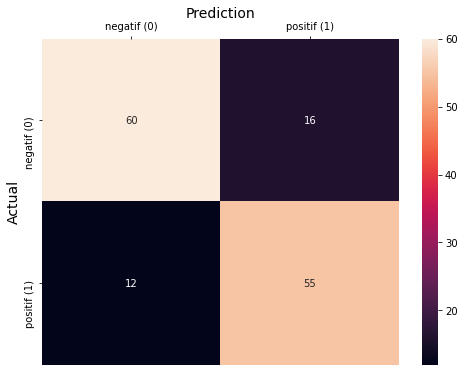

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
fig, ax = plt.subplots(figsize = (8,6))
sns.heatmap(confusion_matrix(y_true = y_test, y_pred = y_pred), fmt = 'g', annot = True)
ax.xaxis.set_label_position('top')
ax.xaxis.set_ticks_position('top')
ax.set_xlabel('Prediction', fontsize = 14)
ax.set_xticklabels(['negatif (0)', 'positif (1)'])
ax.set_ylabel('Actual', fontsize = 14)
ax.set_yticklabels(['negatif (0)', 'positif (1)'])
plt.show()

In [2]:
import pandas as pd
# Load dataset
klas_ = pd.read_csv("data_klasifikasi.csv", encoding ='utf8')
print("Data size : ", klas_.shape)
klas_.head(5)

Data size :  (650, 2)


,waktu,tweets
0,2022-12-23 03:01:06,picu konflik sara sengaja lolos cipta kondisi ...
1,2022-12-23 02:57:23,jokowi milu sportif demokrat upaya tunda milu
2,2022-12-23 02:45:22,tahap tunda milu
3,2022-12-23 02:45:17,hubung gara ketua kpu cabul milu tunda
4,2022-12-23 02:43:29,tunda


In [3]:
#definisi dataframe
df_klas = pd.DataFrame(klas_[['waktu', 'tweets']])
df_klas

,waktu,tweets
0,2022-12-23 03:01:06,picu konflik sara sengaja lolos cipta kondisi ...
1,2022-12-23 02:57:23,jokowi milu sportif demokrat upaya tunda milu
2,2022-12-23 02:45:22,tahap tunda milu
3,2022-12-23 02:45:17,hubung gara ketua kpu cabul milu tunda
4,2022-12-23 02:43:29,tunda
...,...,...
645,2022-12-13 23:19:42,tuju cerita tunda milu wacana periode
646,2022-12-13 22:52:45,negara nenek moyang kudeta konstitusi undang b...
647,2022-12-13 22:23:28,cebong ngotot tunda milu periode iya iya kasih...
648,2022-12-13 22:04:54,harus milu tundatetapi tiadakansoal dpn matara...


In [93]:
def TestModel (data):
    teks = pd.concat([klas_['tweets']], axis = 0).astype("str")
    #X_vect = CountVectorizer(ngram_range=(1,2))    # Unigram and Bigram
    vectorized_data = count_vectorizer.fit_transform(teks)
    #Xtrack = final_vectorized_data
    std_pred = model_naive.predict(vectorized_data)
    pred_labels = []
    for i in std_pred:
        if i >= 0.5:
            pred_labels.append(1)
        else:
            pred_labels.append(0)
    
    df_klas = pd.DataFrame(data = {'Waktu' : klas_['waktu'], 'Tweets' : teks, 'Sentimen' : pred_labels})
    return df_klas

TestModel(texts)

,Waktu,Tweets,Sentimen
0,2022-12-23 03:01:06,picu konflik sara sengaja lolos cipta kondisi ...,1
1,2022-12-23 02:57:23,jokowi milu sportif demokrat upaya tunda milu,0
2,2022-12-23 02:45:22,tahap tunda milu,0
3,2022-12-23 02:45:17,hubung gara ketua kpu cabul milu tunda,1
4,2022-12-23 02:43:29,tunda,0
...,...,...,...
645,2022-12-13 23:19:42,tuju cerita tunda milu wacana periode,1
646,2022-12-13 22:52:45,negara nenek moyang kudeta konstitusi undang b...,0
647,2022-12-13 22:23:28,cebong ngotot tunda milu periode iya iya kasih...,0
648,2022-12-13 22:04:54,harus milu tundatetapi tiadakansoal dpn matara...,0


In [94]:
TestModel(texts).to_csv('Hasil_Test/Analisis_MNBC.csv',encoding='utf8', index=False)

In [95]:
# Load dataset
tweet_df = pd.read_csv("Hasil_Test/Analisis_MNBC.csv", encoding ='utf8')
tweet_df.head(5)

,Waktu,Tweets,Sentimen
0,2022-12-23 03:01:06,picu konflik sara sengaja lolos cipta kondisi ...,1
1,2022-12-23 02:57:23,jokowi milu sportif demokrat upaya tunda milu,0
2,2022-12-23 02:45:22,tahap tunda milu,0
3,2022-12-23 02:45:17,hubung gara ketua kpu cabul milu tunda,1
4,2022-12-23 02:43:29,tunda,0


In [96]:
tweet_df['Sentimen'].value_counts()

0    439
1    211
Name: Sentimen, dtype: int64

In [97]:
def polarity_encode(x):
    if(x == 1):
        return 'Positif'
    if(x == 0):
        return 'Negatif'
tweet_df.Sentimen = tweet_df.Sentimen.apply(polarity_encode)
#tweet_df.head()

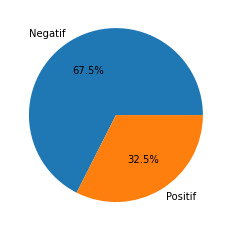

<Figure size 432x288 with 0 Axes>

In [98]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (4, 4))
sizes = [count for count in tweet_df['Sentimen'].value_counts()]
labels = list(tweet_df['Sentimen'].value_counts().index)
explode = (0, 0)
ax.pie(x = sizes, labels = labels, autopct = '%1.1f%%', explode = explode, textprops={'fontsize': 10})
plt.show()
#plt.savefig("gambar/klasifikasi_nbc.png")